# **Evidence 2: Unsupervised Learning**

### Rodrigo Jiménez Ortiz - A01029623
### Ricardo Villarreal Bazán - A01666859
### Bertín Flores Silva - A01660604

In this second evidence, we explore unsupervised learning techniques to uncover hidden patterns in the Obesity dataset by applying the K-means clustering algorithm. Unlike classification tasks, clustering does not use predefined labels. Instead, it aims to group individuals based on similarities across multiple features, both categorical and numerical. The goal is to identify natural groupings in the data, without relying on the obesity level labels.

To determine the optimal number of clusters, we employ both the Elbow Method and Silhouette Analysis. Once clusters are formed, we analyze their characteristics using descriptive statistics and visualize the key differentiators through a decision tree classifier. Finally, we compare the discovered clusters to the original obesity classes to evaluate whether the unsupervised approach aligns with medically recognized obesity categories and to assess the interpretability and usefulness of the clusters.

#### **Imports:**

In [6]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### **Preprocess:**

In [ ]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Separate features
num_features = [
    "Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"
]

cat_features = [
    "Gender", "family_history_with_overweight", "FAVC", "CAEC",
    "SMOKE", "SCC", "CALC", "MTRANS"
]


# Pipelines for each type of feature
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Drop the class label
X_clustering = df.drop("NObeyesdad", axis=1)

# Apply the same preprocessing pipeline as before
X_clust_transformed = full_pipeline.fit_transform(X_clustering)


#### **Elbow Method for selecting K:**

c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

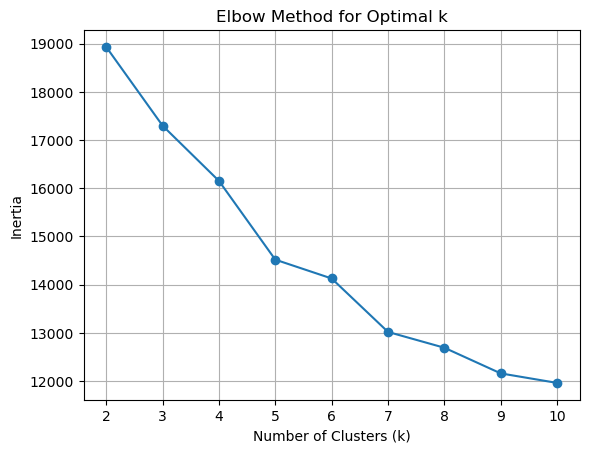

In [9]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clust_transformed)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


#### **Silhouette score:**

c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

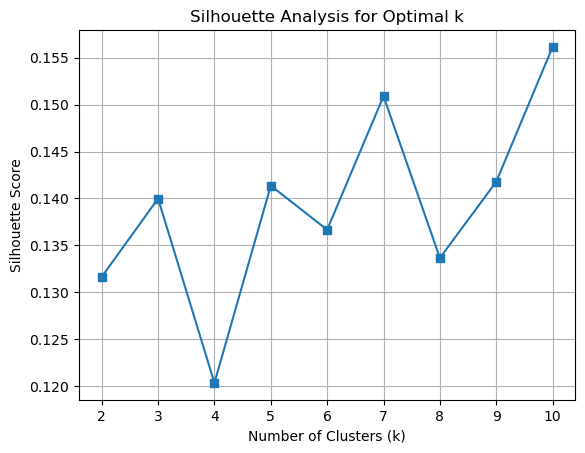

In [10]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_clust_transformed)
    score = silhouette_score(X_clust_transformed, labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='s')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.grid(True)
plt.show()


#### **Apply KMeans with optimal K:**

In [13]:
# Replace with the k value you chose from elbow/silhouette
optimal_k = 7

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_clust_transformed)

# Add clusters to the original DataFrame
df["Cluster"] = clusters


c:\Users\Asus\anaconda3\envs\IDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


#### **Descriptive statistics:**

In [14]:
# You can summarize selected numerical features per cluster
cluster_summary = df.groupby("Cluster").describe(include='all')
print(cluster_summary)


        Gender                                                    ...  \
         count unique     top freq mean  std  min  25%  50%  75%  ...   
Cluster                                                           ...   
0          262      2  Female  170  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1          270      2  Female  146  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2          279      2  Female  234  NaN  NaN  NaN  NaN  NaN  NaN  ...   
3          282      2    Male  254  NaN  NaN  NaN  NaN  NaN  NaN  ...   
4          333      2  Female  330  NaN  NaN  NaN  NaN  NaN  NaN  ...   
5          283      2    Male  149  NaN  NaN  NaN  NaN  NaN  NaN  ...   
6          402      2    Male  401  NaN  NaN  NaN  NaN  NaN  NaN  ...   

        NObeyesdad                                                          \
            unique                  top freq mean  std  min  25%  50%  75%   
Cluster                                                                      
0                6   Overweight_Lev

#### **Decision tree with clusters as classes:**

In [15]:
# Use the same transformed features, but clusters as labels
X_train, X_test, y_train, y_test = train_test_split(
    X_clust_transformed, clusters, test_size=0.3, random_state=42
)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print("Decision Tree Classifier on Clusters:")
print(classification_report(y_test, y_pred))


Decision Tree Classifier on Clusters:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        75
           1       0.88      0.91      0.90        70
           2       0.73      0.67      0.70        89
           3       0.64      0.62      0.63        89
           4       1.00      0.97      0.98       100
           5       0.53      0.77      0.63        90
           6       0.85      0.69      0.76       121

    accuracy                           0.77       634
   macro avg       0.79      0.78      0.78       634
weighted avg       0.79      0.77      0.78       634



#### **Comparing clusters:**

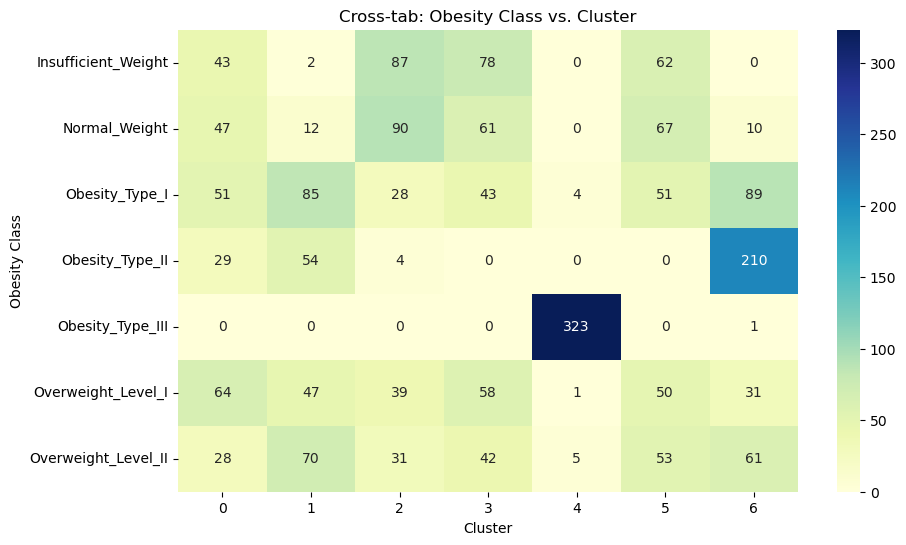

In [16]:
# Cross-tabulation of original classes vs new clusters
cross_tab = pd.crosstab(df["NObeyesdad"], df["Cluster"])

# Heatmap to visualize how clusters align with classes
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Cross-tab: Obesity Class vs. Cluster")
plt.ylabel("Obesity Class")
plt.xlabel("Cluster")
plt.show()


#### **Interpretation of the clusters:**